# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import driver

/home/rschwantes/anaconda3/envs/py36_monet2/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:50: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = 'control.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-19-00:00:00',
  'end_time': '2019-08-20-00:00:00'},
 'model': {'cmaq_oper': {'files': '/wrk/d2/rschwantes/cmaq/surface/CMAQ_OPER/gpfs_prod_aqm/0818/aqm.t12z.aconc_sfc.ncf',
   'mod_type': 'cmaq',
   'radius_of_influence': 12000,
   'mapping': {'airnow': {'CO': 'CO',
     'NO': 'NO',
     'NO2': 'NO2',
     'PM25_TOT': 'PM2.5',
     'O3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'dodgerblue', 'marker': '+', 'linestyle': '-.'}},
  'cmaq_expt': {'files': '/wrk/d2/rschwantes/cmaq/surface/CMAQ_EXPT/0818/aqm.20190818.t12z.aconc-pm25_48.ncf',
   'mod_type': 'cmaq',
   'radius_of_influence': 12000,
   'mapping': {'airnow': {'CO': 'CO',
     'NO2': 'NO2',
     'NO': 'NO',
     'PM25_TOT': 'PM2.5',
     'O3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}},
  'wrfchem_v4.0': {'files': '/wrk/d2/rschwantes/wrf/covidaqs/run_CONUS_fv19_BEIS_1.0xISO_RACM_VCP_emisv2_ltng/0819/*',
 

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

cmaq_oper
{'files': '/wrk/d2/rschwantes/cmaq/surface/CMAQ_OPER/gpfs_prod_aqm/0818/aqm.t12z.aconc_sfc.ncf', 'mod_type': 'cmaq', 'radius_of_influence': 12000, 'mapping': {'airnow': {'CO': 'CO', 'NO': 'NO', 'NO2': 'NO2', 'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'dodgerblue', 'marker': '+', 'linestyle': '-.'}}
/wrk/d2/rschwantes/cmaq/surface/CMAQ_OPER/gpfs_prod_aqm/0818/aqm.t12z.aconc_sfc.ncf
cmaq_expt
{'files': '/wrk/d2/rschwantes/cmaq/surface/CMAQ_EXPT/0818/aqm.20190818.t12z.aconc-pm25_48.ncf', 'mod_type': 'cmaq', 'radius_of_influence': 12000, 'mapping': {'airnow': {'CO': 'CO', 'NO2': 'NO2', 'NO': 'NO', 'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}}
/wrk/d2/rschwantes/cmaq/surface/CMAQ_EXPT/0818/aqm.20190818.t12z.aconc-pm25_48.ncf
wrfchem_v4.0
{'files': '/wrk/d2/rschwantes/wrf/covidaqs/run_CONUS_fv19_BEIS_1.0xISO_RACM_VCP_emisv2_ltng/0819/*', 'mod_type': 'wrfche

In [5]:
an.models

{'cmaq_oper': <driver.model at 0x7f594a2357b8>,
 'cmaq_expt': <driver.model at 0x7f598d7c5940>,
 'wrfchem_v4.0': <driver.model at 0x7f598bfda898>}

In [6]:
an.models['wrfchem_v4.0'].obj

<xarray.Dataset>
Dimensions:    (time: 31, x: 440, y: 284, z: 1)
Coordinates:
    longitude  (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude   (y, x) float32 21.19 21.22 21.24 21.27 ... 50.33 50.28 50.24 50.2
    XTIME      (time) float64 0.0 60.0 120.0 180.0 ... 1.68e+03 1.74e+03 1.8e+03
  * time       (time) datetime64[ns] 2019-08-19 ... 2019-08-20T06:00:00
    datetime   (time) datetime64[ns] 2019-08-19 ... 2019-08-20T06:00:00
Dimensions without coordinates: x, y, z
Data variables:
    o3         (time, z, y, x) float32 27.79 27.78 27.9 ... 25.89 27.56 27.65
    no         (time, z, y, x) float32 0.004592 0.004636 ... 0.001111 0.001317
    no2        (time, z, y, x) float32 0.01607 0.01615 0.01669 ... 0.1962 0.2122
    so2        (time, z, y, x) float32 0.001822 0.001874 ... 0.08352 0.09038
    co         (time, z, y, x) float32 77.55 77.55 77.65 ... 80.17 80.0 80.04
    PM2_5_DRY  (time, z, y, x) float32 1.942 1.948 1.992 ... 1.104 0.6721 0.7451
    pressure   (time, z, y, x) float32 1.047e+05 1.046e+05 ... 1.005e+05
    temp       (time, z, y, x) float32 299.2 299.0 299.0 ... 290.6 290.0 290.0
    NOx        (time, z, y, x) float32 0.02066 0.02079 0.02153 ... 0.1973 0.2136
Attributes:
    TRUELAT1:                  33.0
    TRUELAT2:                  45.0
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    proj4_srs:                 +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=39.61...
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'CO': 'C...

In [7]:
#All the info in the model class can be called here.
print(an.models['wrfchem_v4.0'].label)
print(an.models['wrfchem_v4.0'].mapping)

wrfchem_v4.0
{'airnow': {'co': 'CO', 'no2': 'NO2', 'no': 'NO', 'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}}


In [8]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)

2019-08-19 00:00:00
2019-08-20 00:00:00


### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [9]:
an.open_obs()

In [10]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

<xarray.Dataset>
Dimensions:     (time: 1443, x: 3788, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3781 3782 3783 3784 3785 3786 3787
  * time        (time) datetime64[ns] 2019-08-01 ... 2019-08-21T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables: (12/30)
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2Y        (time, y, x) float64 ...
    ...          ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
    time_local  (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-04-08

In [11]:
#This just pairs the data
an.pair_data()

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s


Reference std: 174.19688409683081
Reference std: 141.0571412991448
Reference std: 6.3446119226225095
Reference std: 5.644406635772202
Reference std: 6.930684238520537
Reference std: 5.999257984177368
Reference std: 4.650828737273964
Reference std: 3.0691964002503607
Reference std: 15.835513483882263
Reference std: 15.044079309939237


/home/rschwantes/anaconda3/envs/py36_monet2/lib/python3.6/site-packages/monet/plots/mapgen.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=figsize, **kwargs)


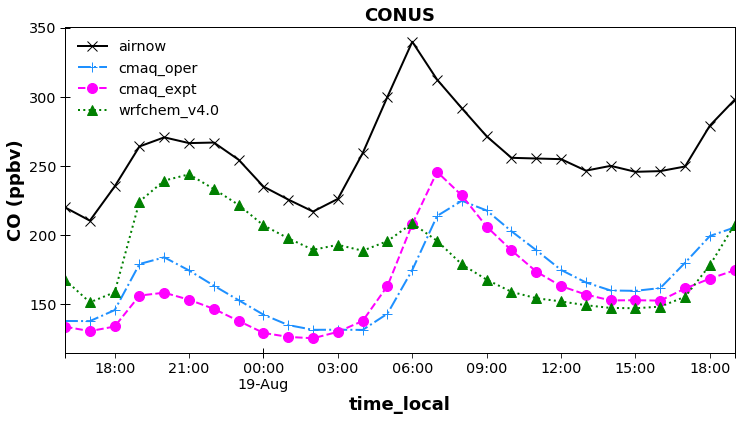

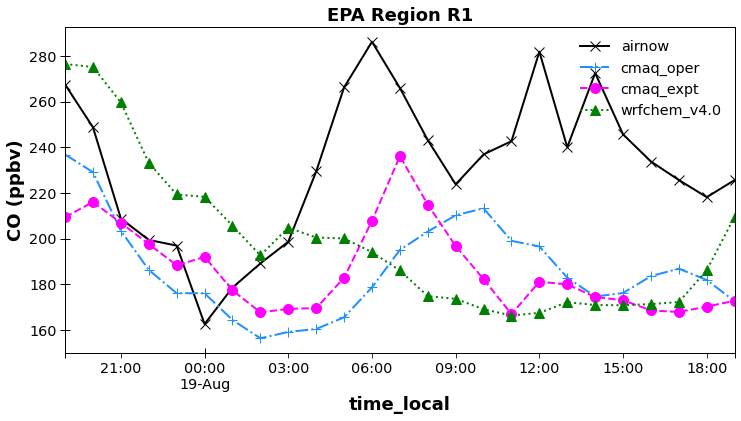

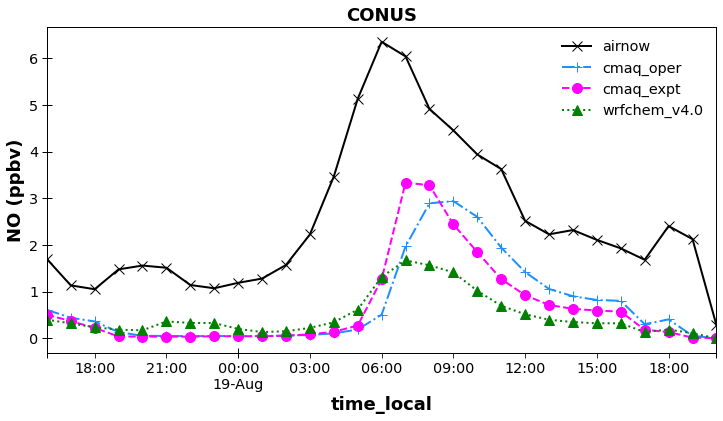

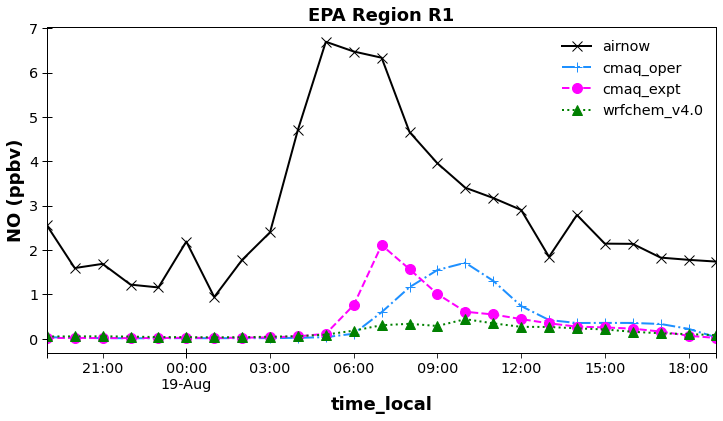

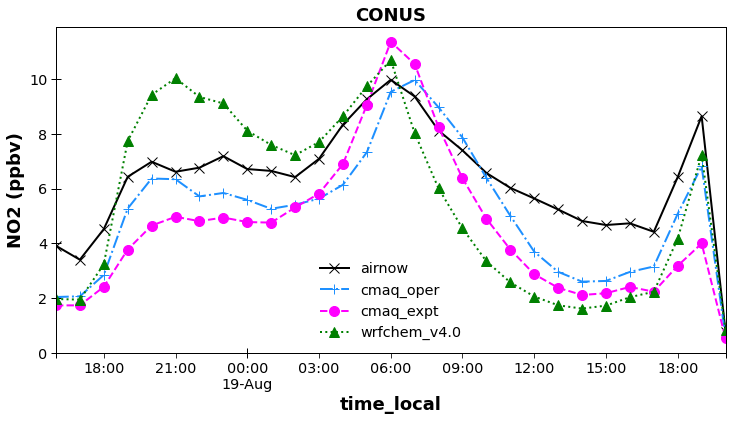

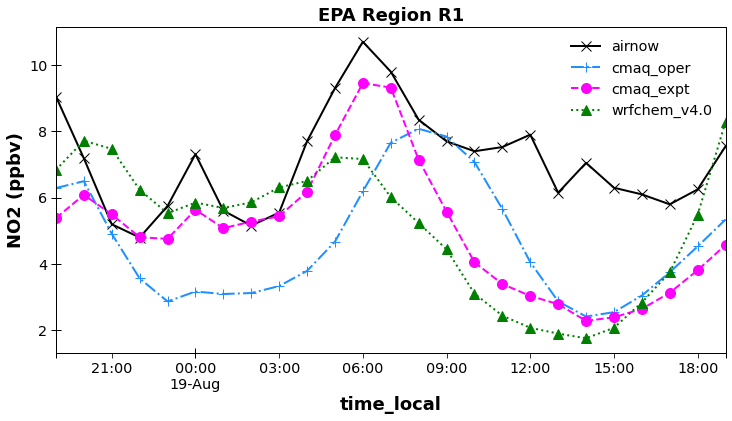

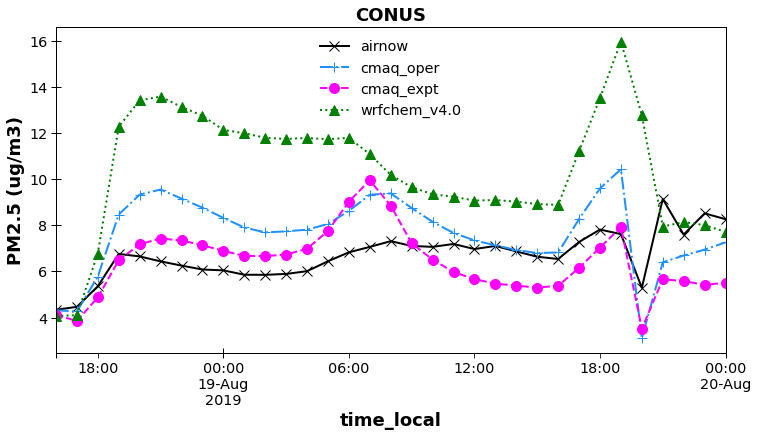

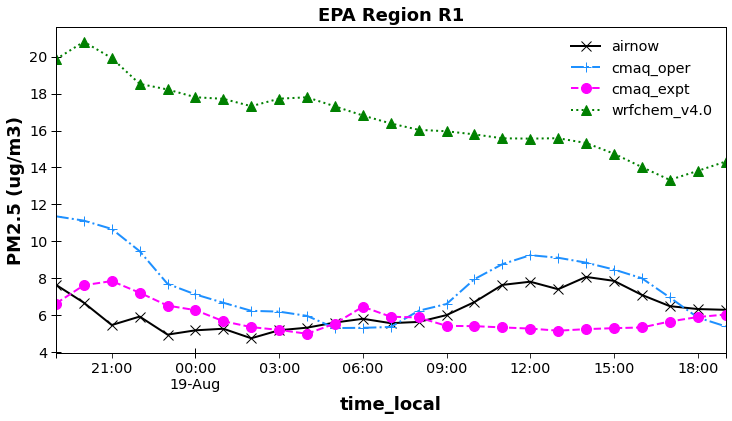

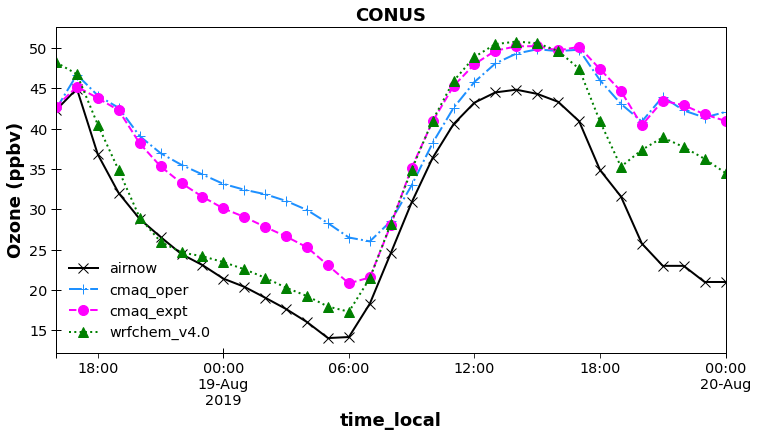

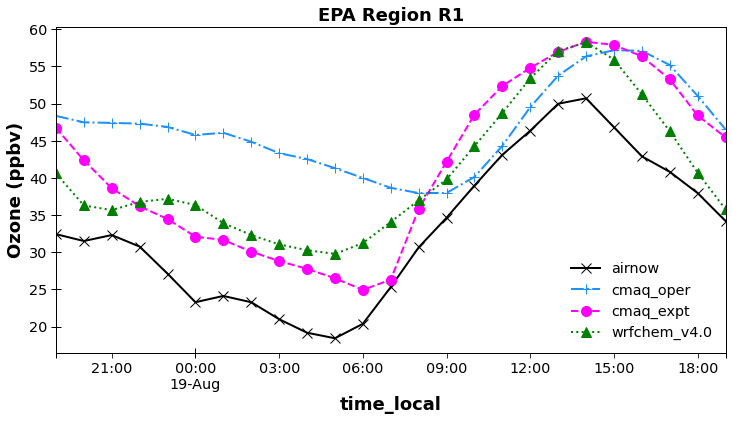

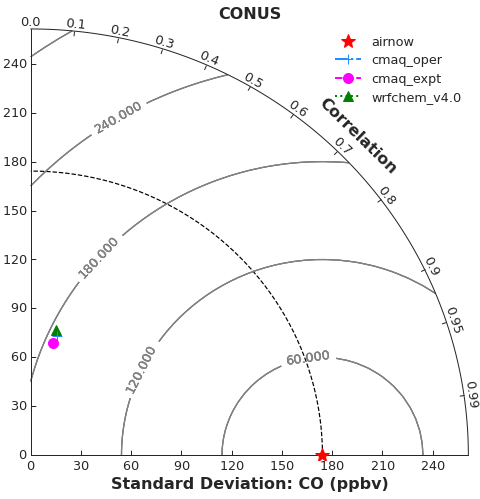

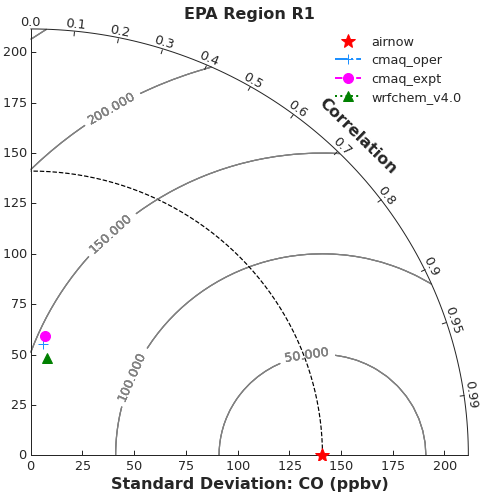

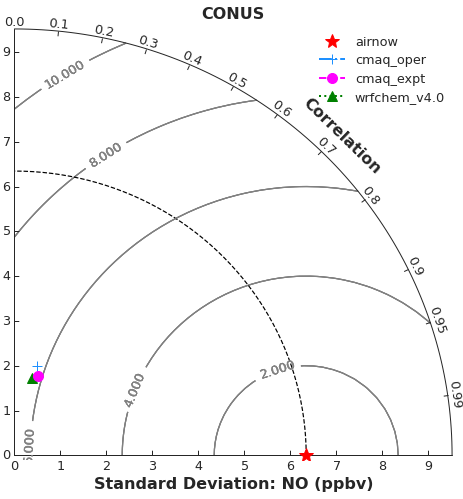

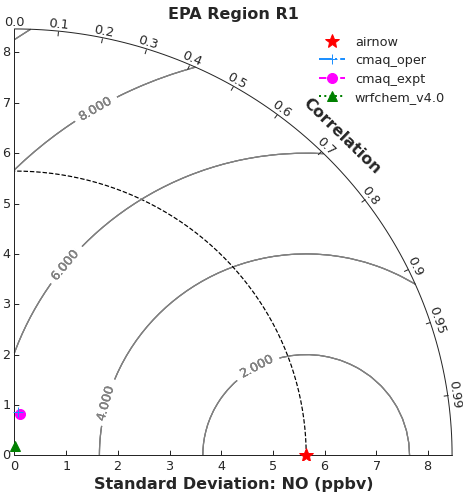

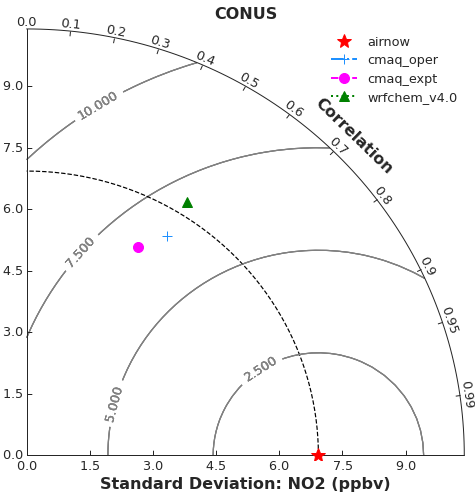

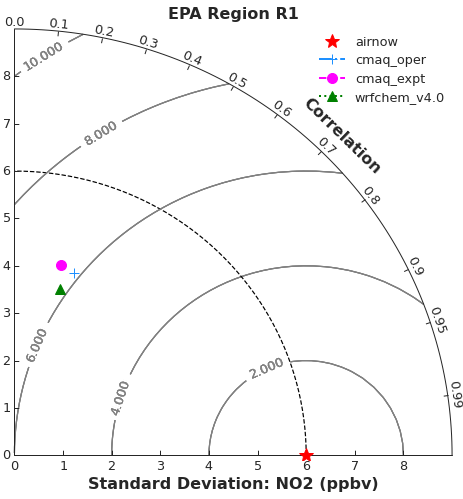

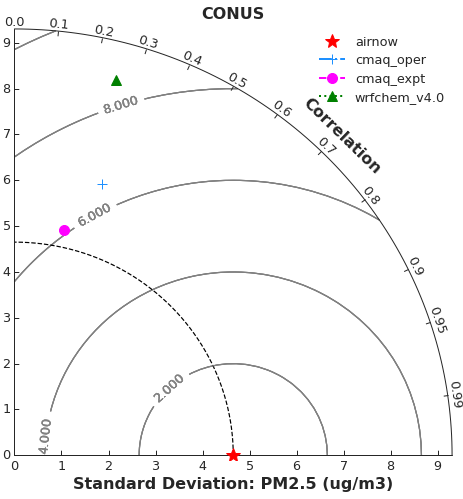

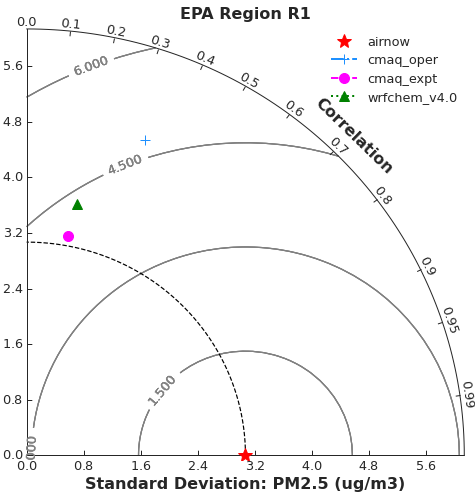

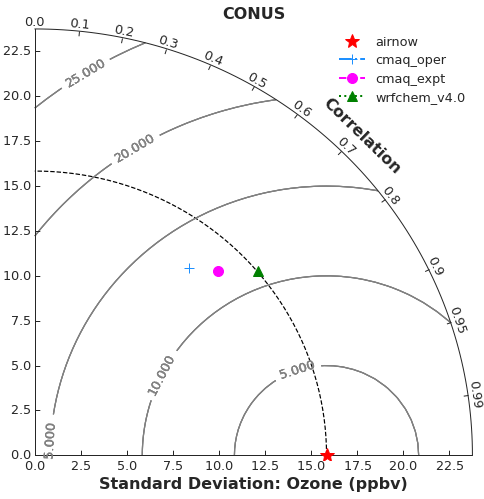

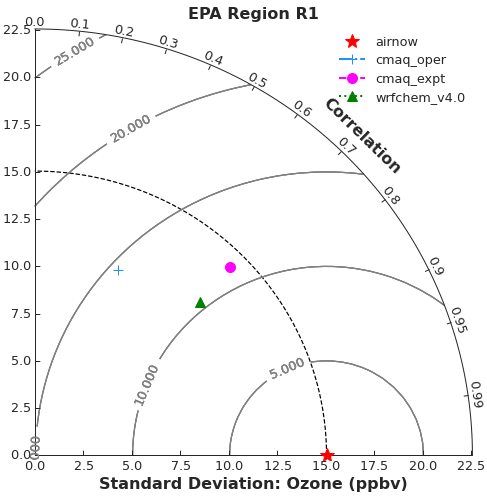

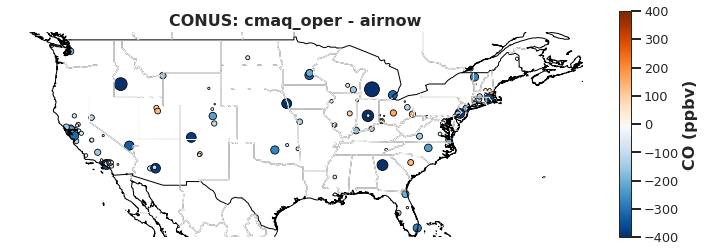

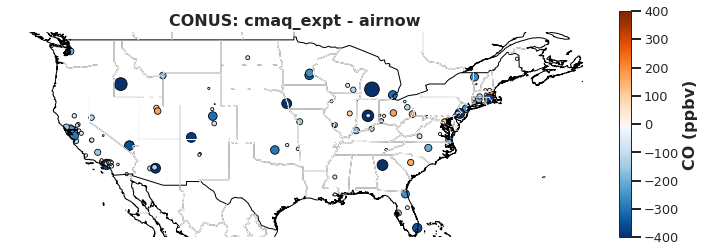

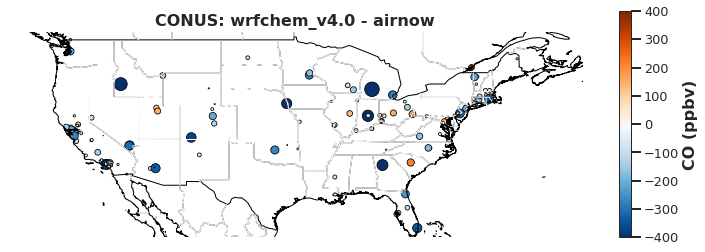

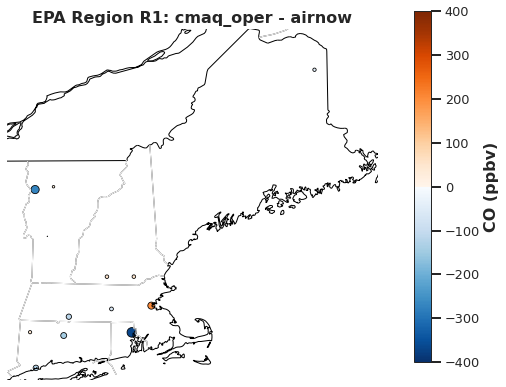

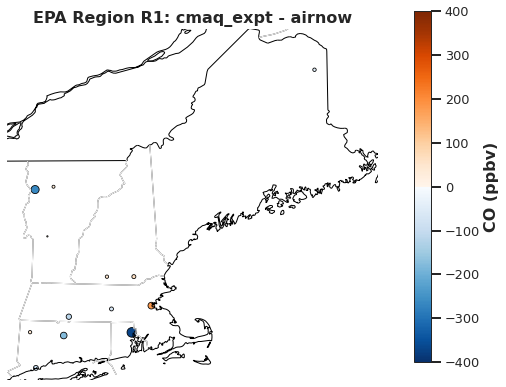

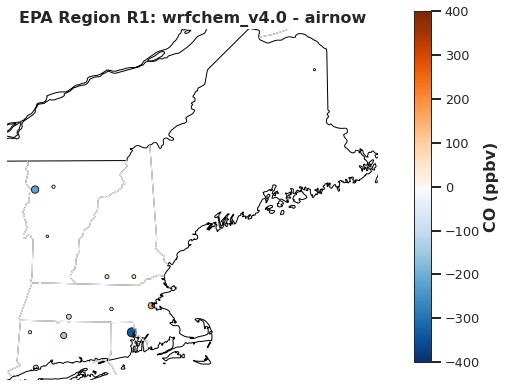

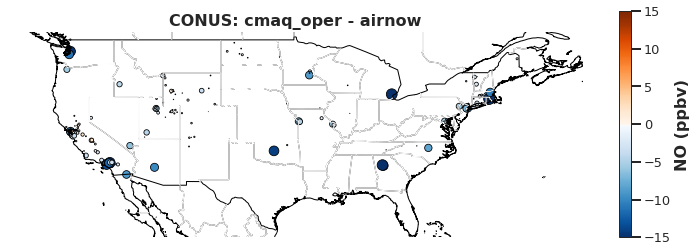

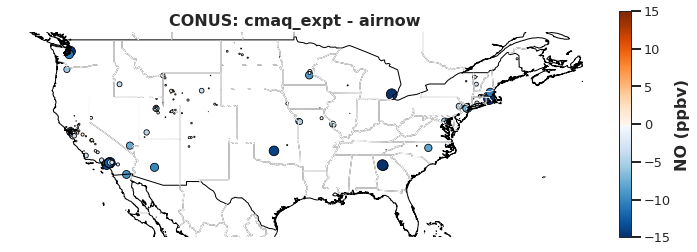

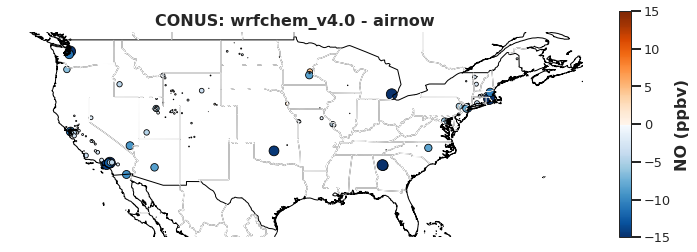

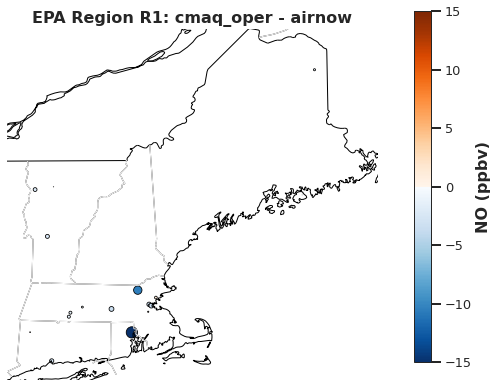

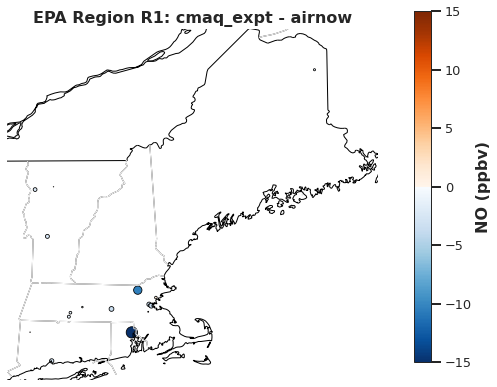

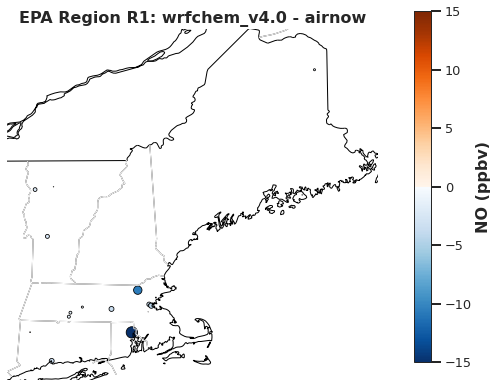

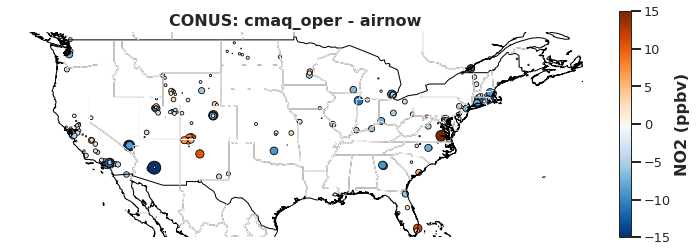

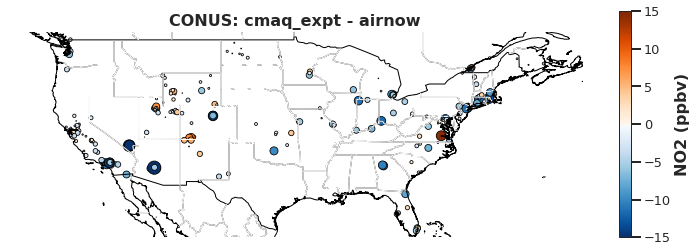

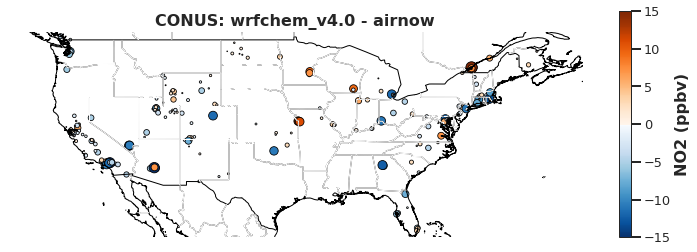

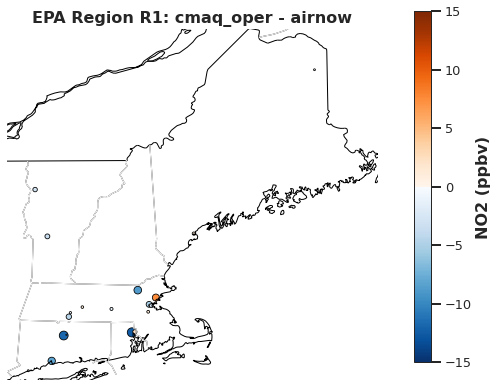

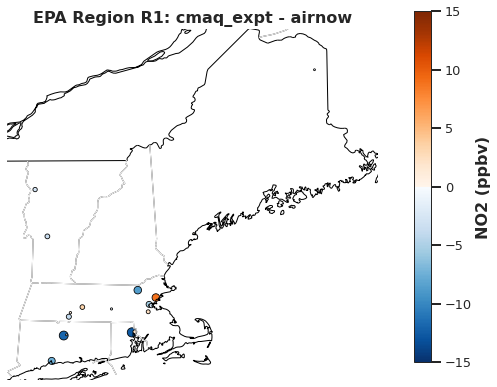

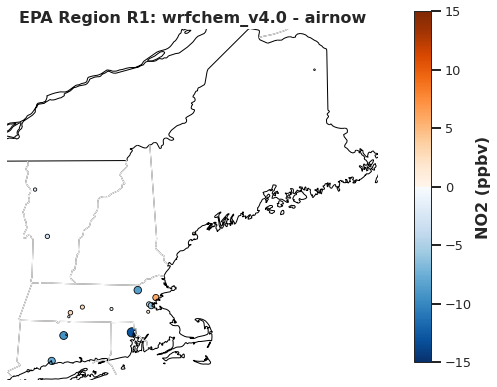

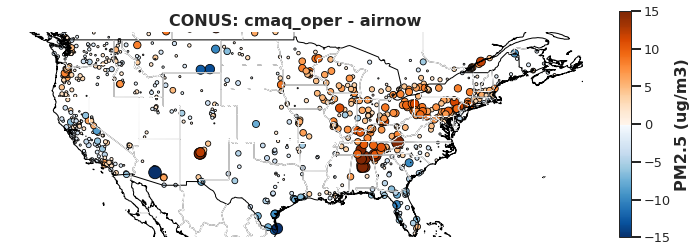

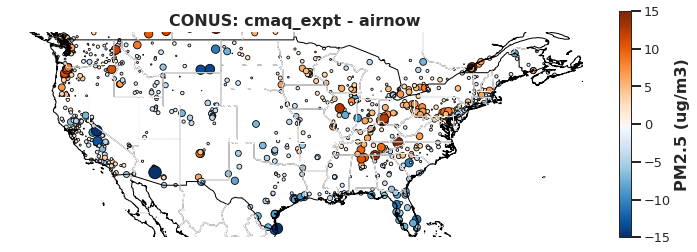

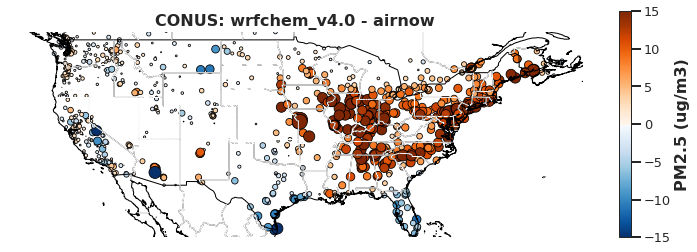

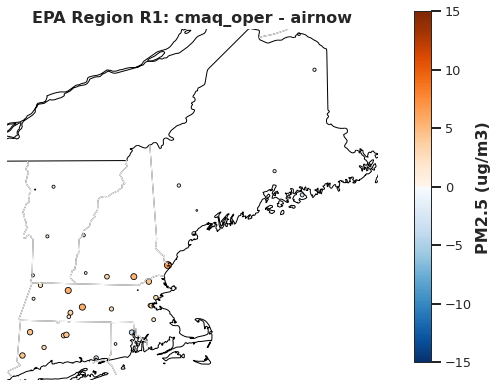

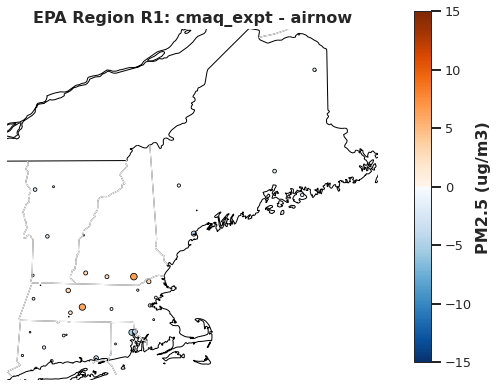

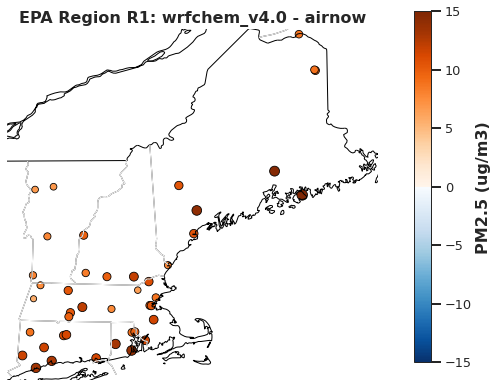

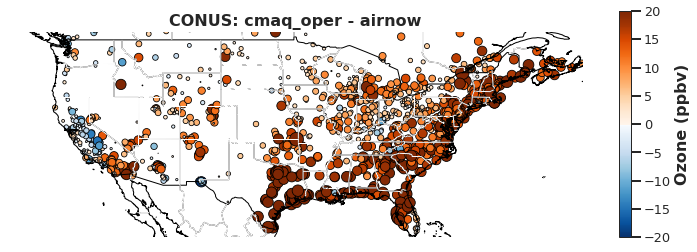

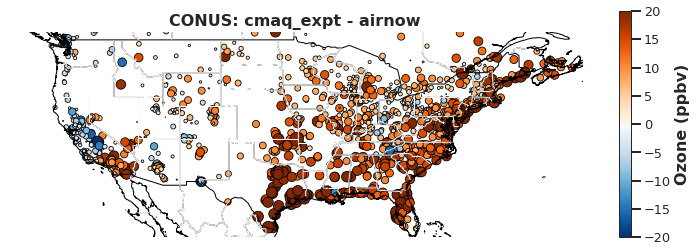

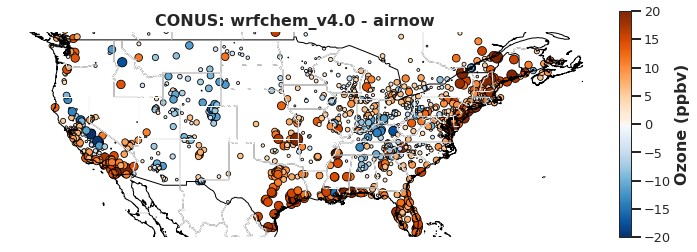

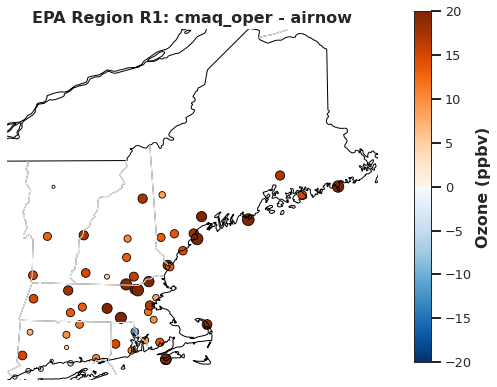

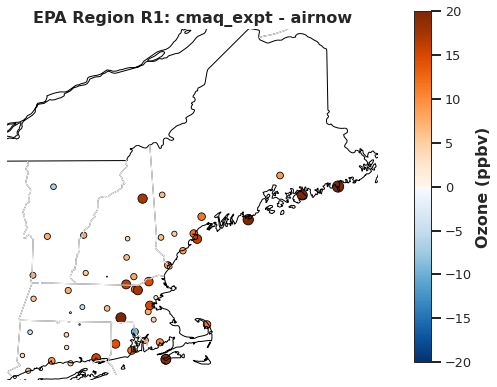

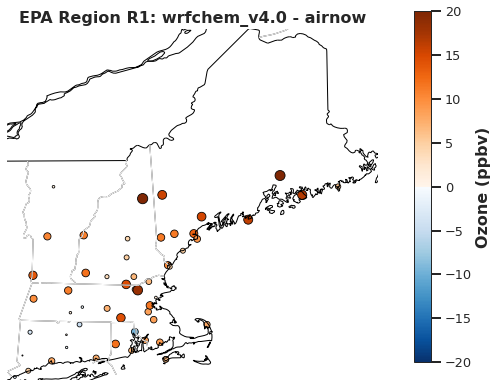

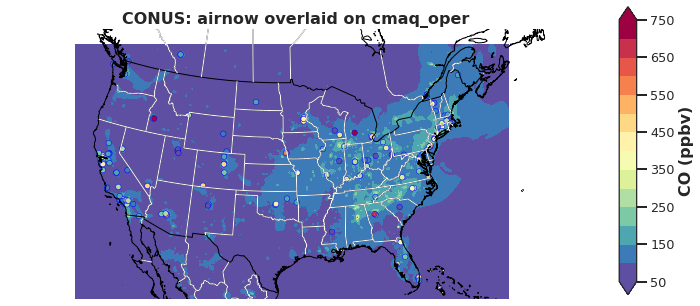

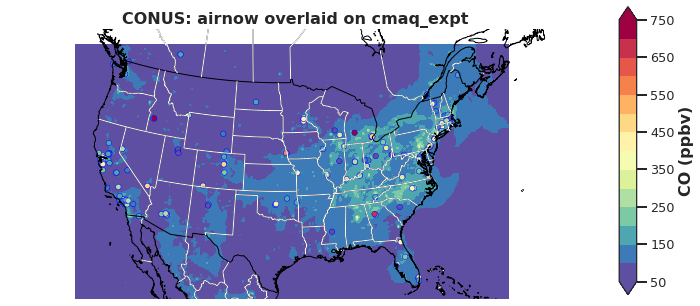

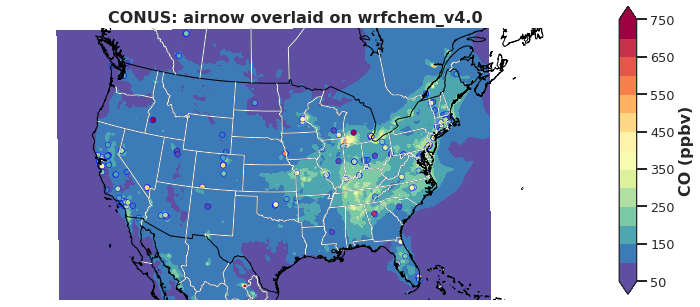

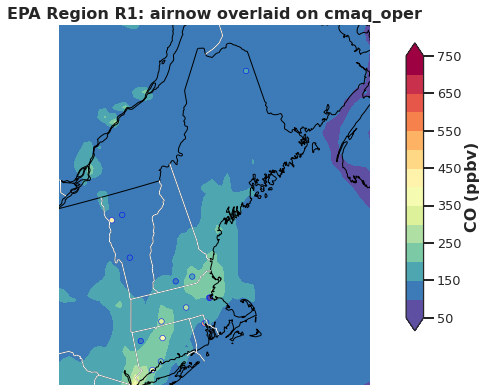

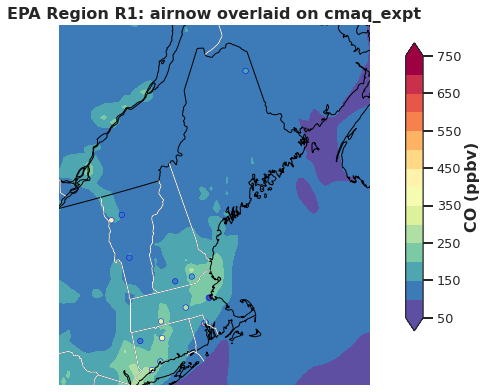

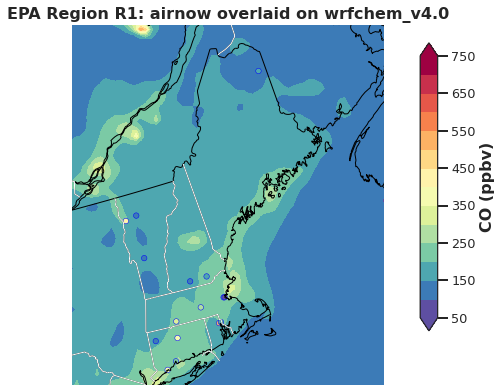

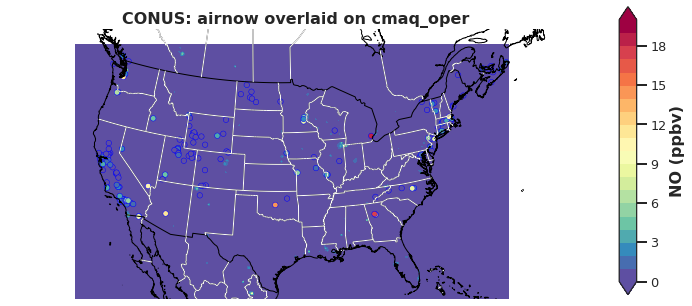

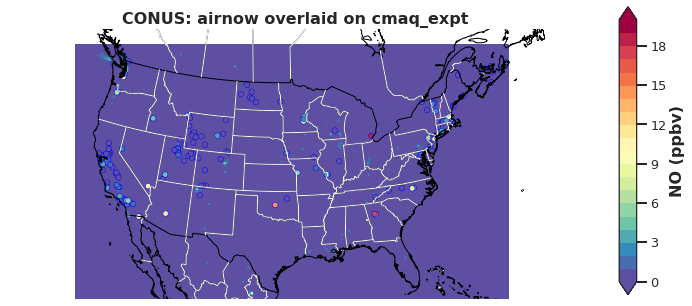

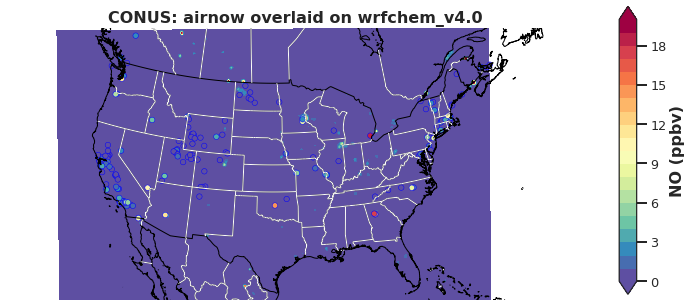

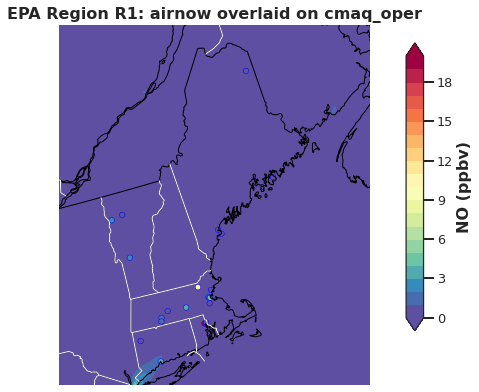

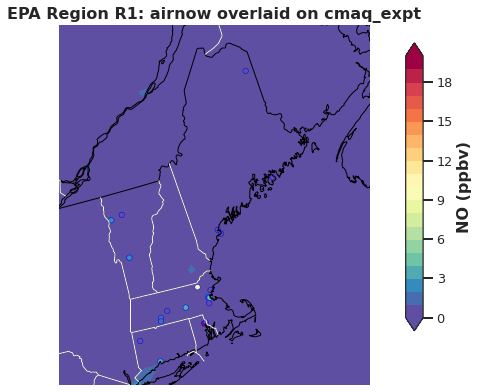

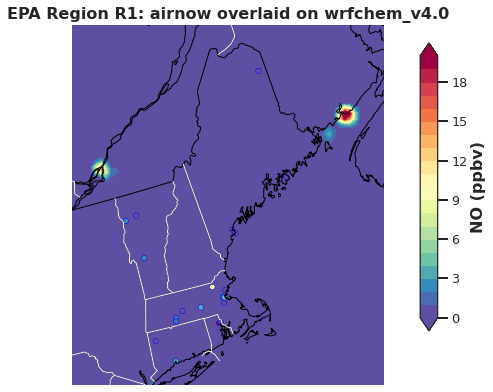

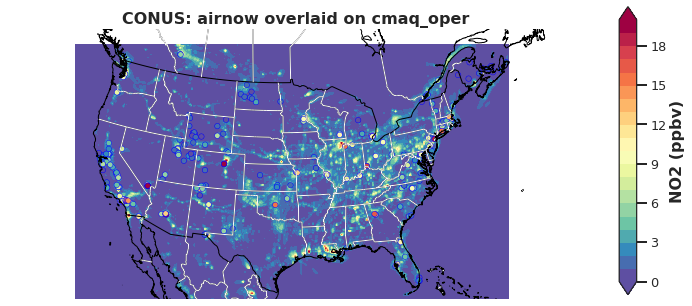

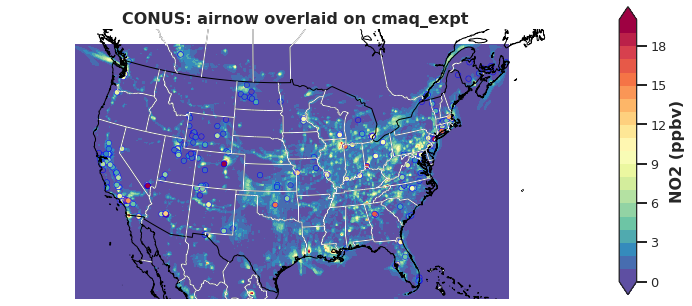

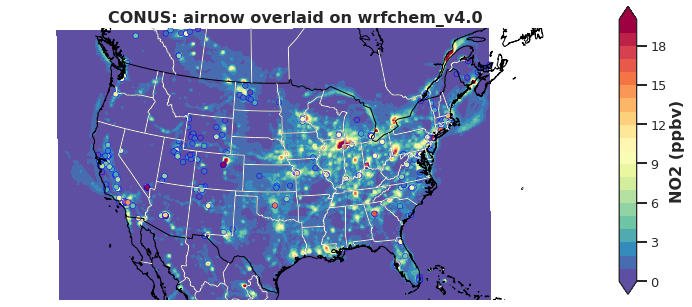

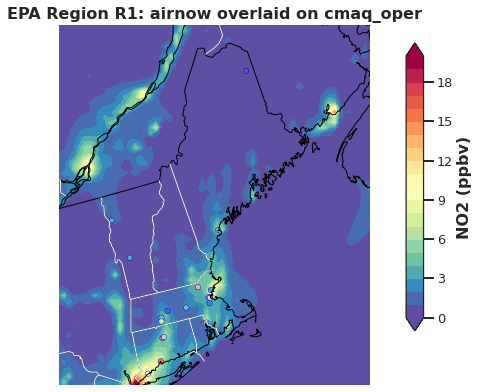

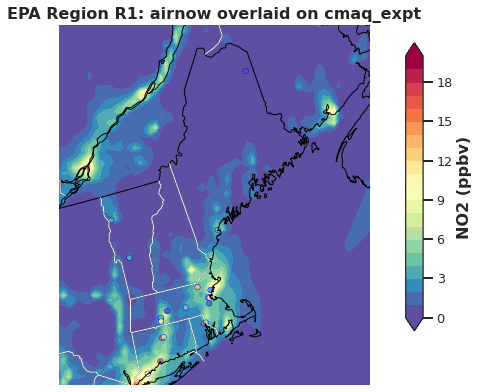

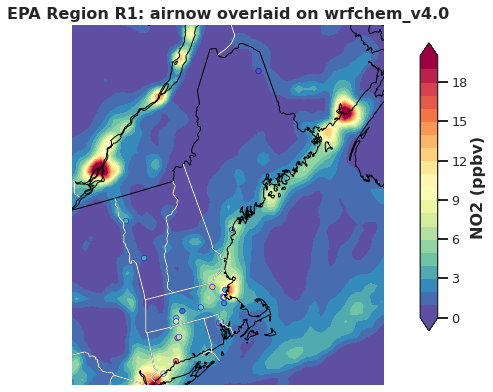

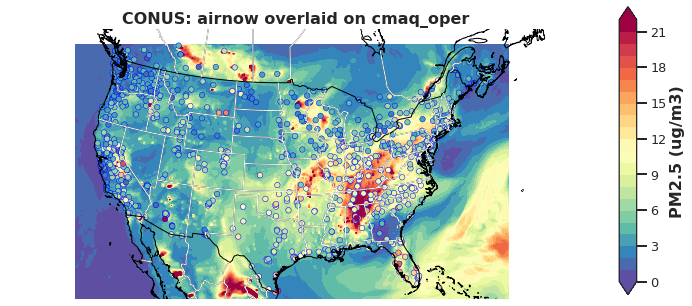

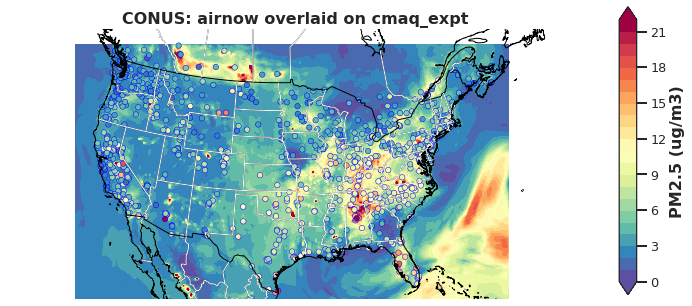

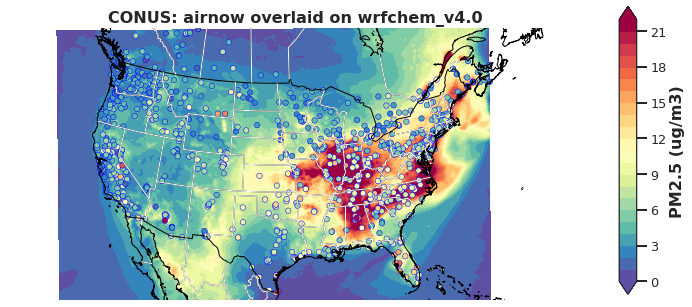

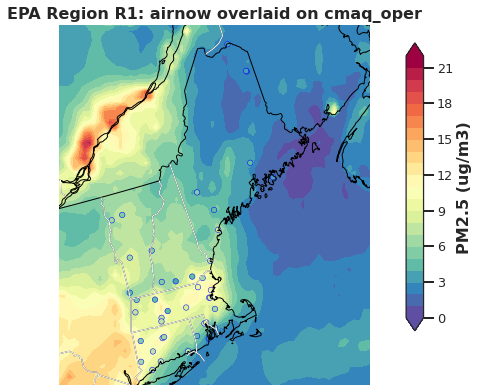

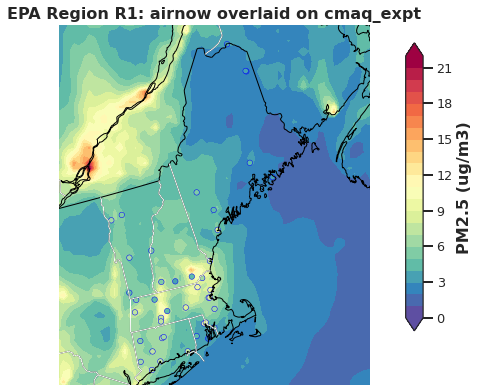

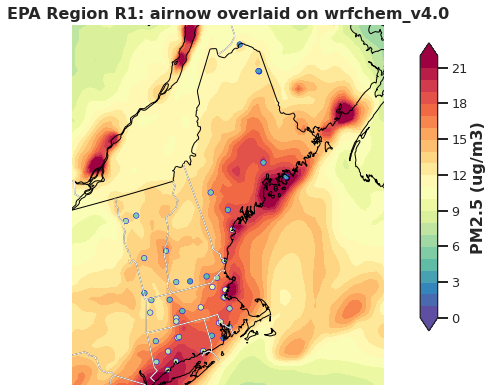

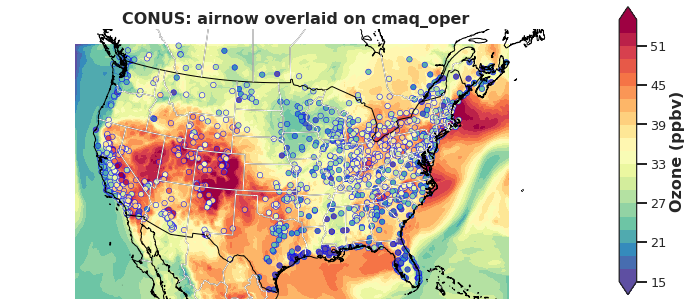

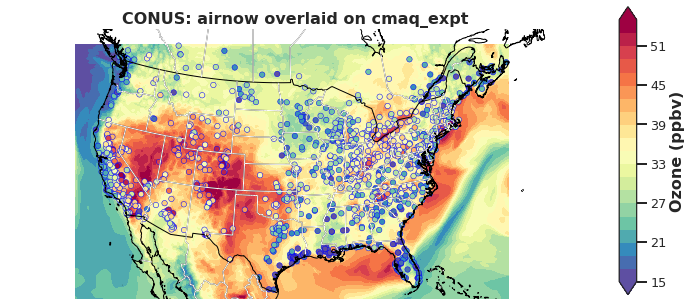

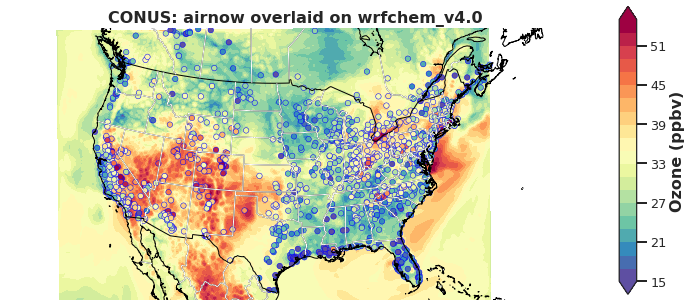

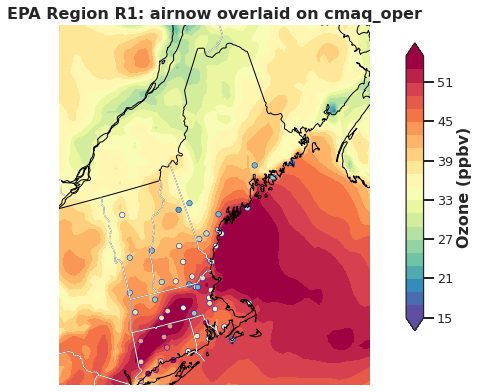

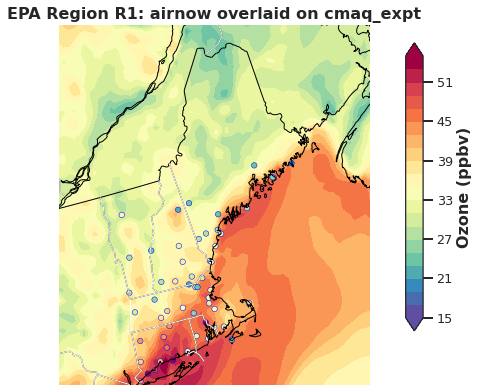

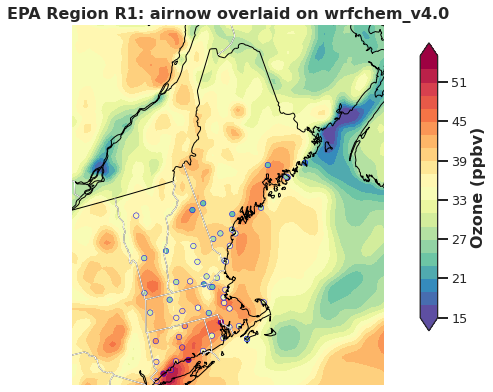

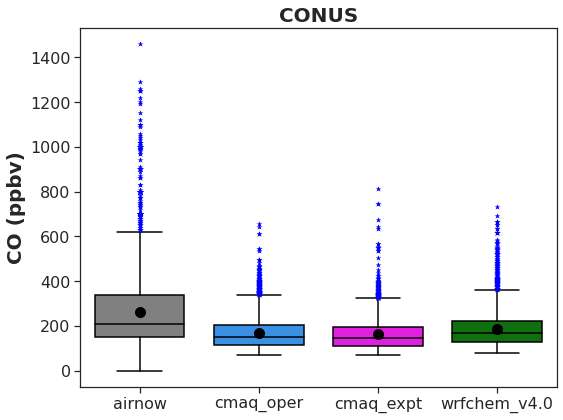

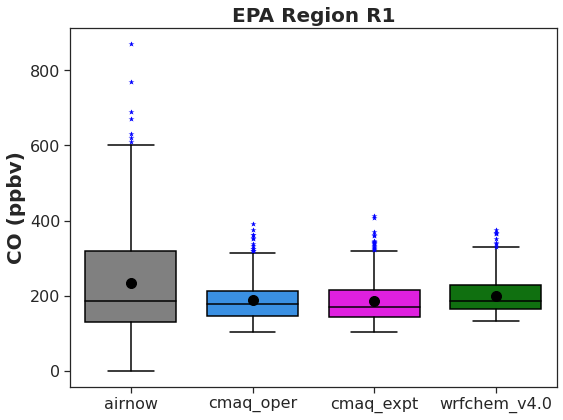

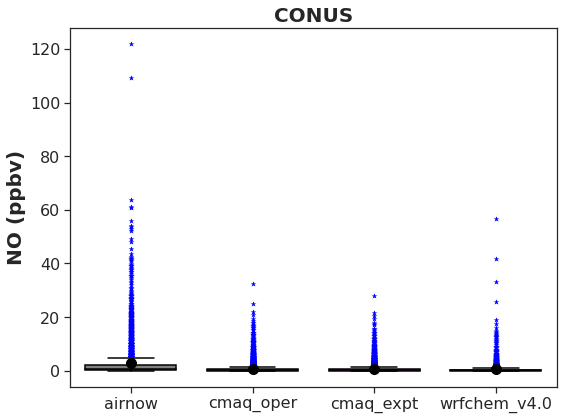

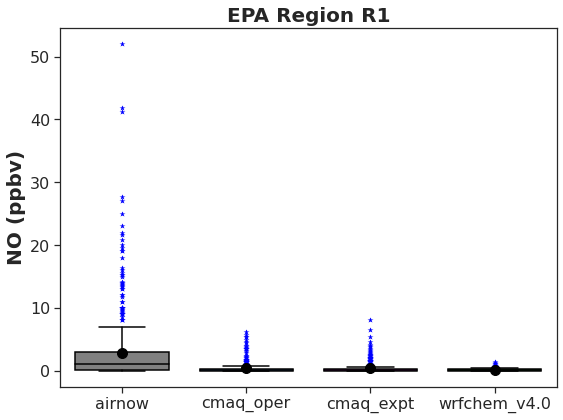

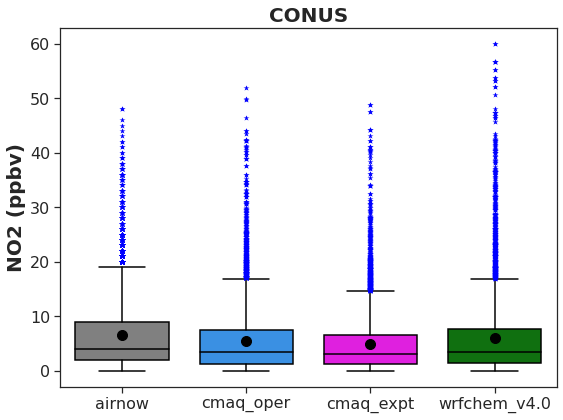

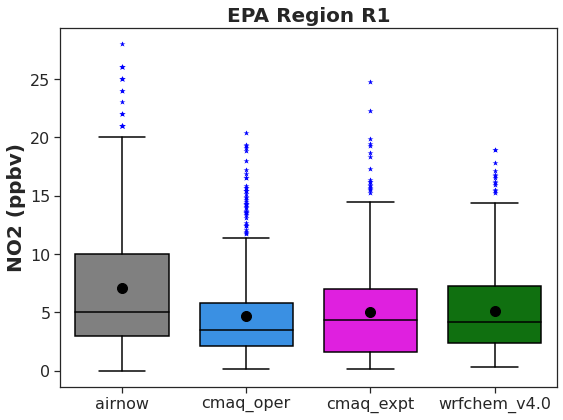

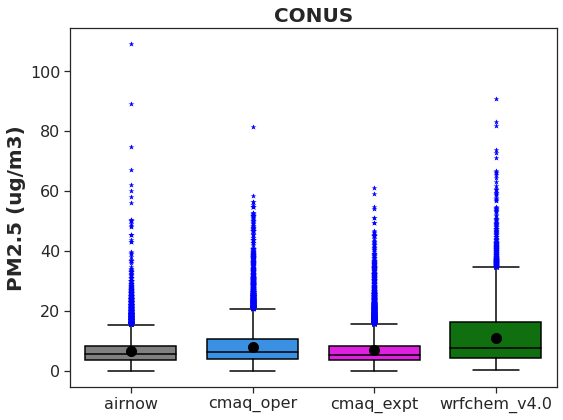

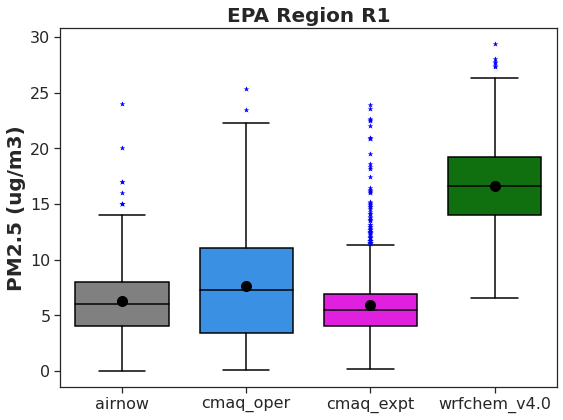

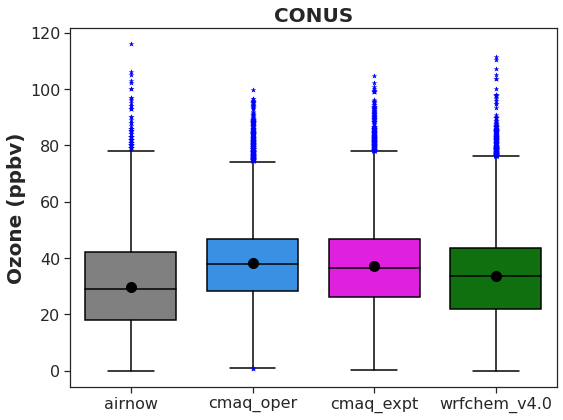

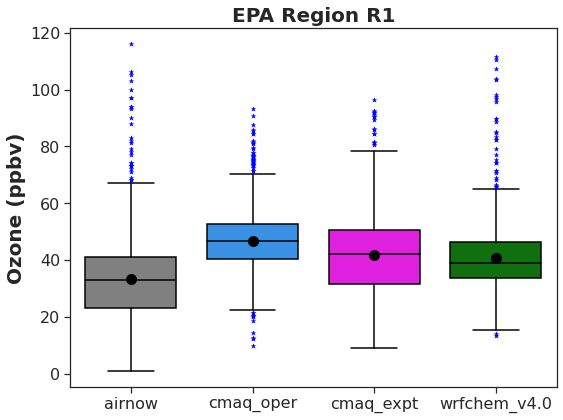

In [12]:
#And this generates all the plots.
an.plotting()